In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
import os
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\VELOX\Downloads\personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [3]:
df.count()

Time_spent_Alone             2837
Stage_fear                   2827
Social_event_attendance      2838
Going_outside                2834
Drained_after_socializing    2848
Friends_circle_size          2823
Post_frequency               2835
Personality                  2900
dtype: int64

In [4]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
df['Time_spent_Alone'].mean()

4.505816002819881

In [6]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)

In [7]:
df['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df['Social_event_attendance'].mean()

3.963354474982382

In [9]:
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [11]:
columns = ['Going_outside','Friends_circle_size', 'Post_frequency']
df[columns].mean()

Going_outside          3.000000
Friends_circle_size    6.268863
Post_frequency         3.564727
dtype: float64

In [12]:
columns = ['Going_outside','Friends_circle_size', 'Post_frequency']

for i in columns:
    print(i)
    df[i].fillna(df[i].mean(),inplace=True)

Going_outside
Friends_circle_size
Post_frequency


In [13]:
df['Drained_after_socializing']=df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


df['Drained_after_socializing']

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
2895    0.0
2896    0.0
2897    1.0
2898    1.0
2899    0.0
Name: Drained_after_socializing, Length: 2900, dtype: float64

In [14]:
df['Drained_after_socializing'] =pd.to_numeric(df['Drained_after_socializing'],errors='coerce')

In [15]:
df['Drained_after_socializing'].mode()

0    0.0
Name: Drained_after_socializing, dtype: float64

In [16]:
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode(), inplace=True)

In [17]:
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [18]:
# Option 1: Fill NaN with a value (e.g., 0 or the mean of the column)
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(0).astype(int)

In [19]:
# Convert 'Yes' to 1 and 'No' to 0
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})

# Now calculate median
median_value = df['Stage_fear'].median()
print(median_value)

0.0


In [20]:
# Option 1: Fill NaN with a value (e.g., 0 or the mean of the column)
df['Stage_fear'] = df['Stage_fear'].fillna(0).astype(int)

In [21]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,Extrovert
2896,3.0,0,8.0,3.0,0,14.0,9.0,Extrovert
2897,4.0,1,1.0,1.0,1,4.0,0.0,Introvert
2898,11.0,1,1.0,3.0,1,2.0,0.0,Introvert


In [22]:
df['Personality']=df['Personality'].map({'Extrovert': 1 ,'Introvert': 0})

In [23]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,0.486207,3.963354,3.000000,0.485172,6.268863,3.564727,0.514138
std,3.441180,0.499896,2.872608,2.221597,0.499866,4.232340,2.893587,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.963354,3.000000,0.000000,5.000000,3.000000,1.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


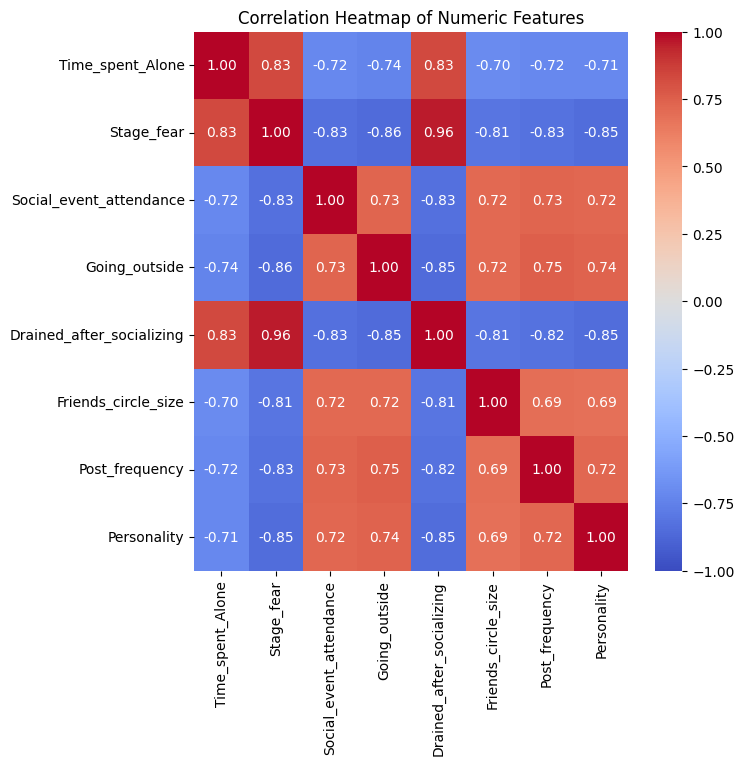

In [24]:
# Correlation heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [25]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0
2898,11.0,1,1.0,3.0,1,2.0,0.0,0


In [29]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x = df.drop('Personality', axis=1)
y = df['Personality']  # Ensure this is a Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def mymodel(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

logreg = LogisticRegression()
mymodel(logreg)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [93]:
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier(random_state=42) 

In [95]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       278
           1       0.91      0.86      0.88       302

    accuracy                           0.88       580
   macro avg       0.88      0.88      0.88       580
weighted avg       0.88      0.88      0.88       580



In [97]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [99]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.94      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [103]:
logreg = LogisticRegression()
trained_model = mymodel(logreg)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [107]:
def mymodel(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    return model  # Return the trained model


In [109]:
logreg = LogisticRegression()
trained_model = mymodel(logreg)

# Now you can safely use predict
y_pred = trained_model.predict(x_test)
print(y_pred)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

[0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 

In [111]:
svm=SVC()
trained_model_svm = mymodel(svm)

# Now you can safely use predict
y_pred = trained_model_svm.predict(x_test)
print(y_pred)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

[0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 